In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, LayerNormalization, Dropout
import pickle
import numpy as np
import json

In [2]:
# Building AlexNet

class AlexNet():
    
    def __init__(self):
        self.model = Sequential()
        self.model.add(Conv2D(96, input_shape=(224, 224, 3), kernel_size=5, activation="relu"))
        self.model.add(LayerNormalization())
        self.model.add(MaxPool2D((3,3)))
        self.model.add(Conv2D(256, kernel_size=5, activation="relu"))
        self.model.add(LayerNormalization())
        self.model.add(MaxPool2D((3,3)))
        self.model.add(Conv2D(384, kernel_size=3, activation="relu"))
        self.model.add(LayerNormalization())
        self.model.add(MaxPool2D((3,3)))
        self.model.add(Conv2D(256, kernel_size=3, activation="relu"))
        self.model.add(LayerNormalization())
        self.model.add(MaxPool2D((3,3)))
        self.model.add(Flatten())
        self.model.add(Dense(4096, activation="leaky_relu"))
        self.model.add(Dropout(0.6))
        self.model.add(Dense(4096, activation="linear"))
        self.model.add(Dropout(0.6))
        self.model.add(Dense(58))
        self.model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00005), loss="mean_squared_error", metrics="accuracy")

In [4]:
model = AlexNet()
#model.model.summary()

In [5]:
# Create custom dataset

with open('ground_truth', 'rb') as file:
    DATA = pickle.load(file)
    
file_paths = ['FLIC/images/' + idx[1] for idx in DATA]
joint_keyframes = [idx[0] for idx in DATA]

ds_train = tf.data.Dataset.from_tensor_slices((file_paths, joint_keyframes))

def read_image(image_file, joint_keyframes):
    image = tf.io.read_file(image_file)
    image = tf.image.decode_image(image, channels=3, dtype=tf.float32)
    image.set_shape([640, 640, 3])
    image = tf.image.resize(image, [224, 224])
    return image, joint_keyframes

def image_resize(image_file, joint_keyframes):
    image = tf.io.read_file(image_file)
    print(image)
    image =  tf.image.decode_jpeg(image, channels=3, dtype=tf.float32) 
    image_file = tf.image.resize(image, [224,224,3])
    
    return image_file, joint_keyframes


ds_train = ds_train.map(read_image).batch(4)

In [ ]:
history = model.model.fit(ds_train, epochs=5)

Epoch 1/5
1251/1251 [==============================] - 1465s 1s/step - loss: 5206.1694 - accuracy: 0.3140
Epoch 2/5
 968/1251 [======================>.......] - ETA: 5:00 - loss: 3976.4014 - accuracy: 0.3187

In [5]:
model.model.load_weights('model.h5')

In [15]:
model.model.train(ds_train)

AttributeError: 'Sequential' object has no attribute 'train'

In [8]:
y_pred = model.model.predict(ds_train)

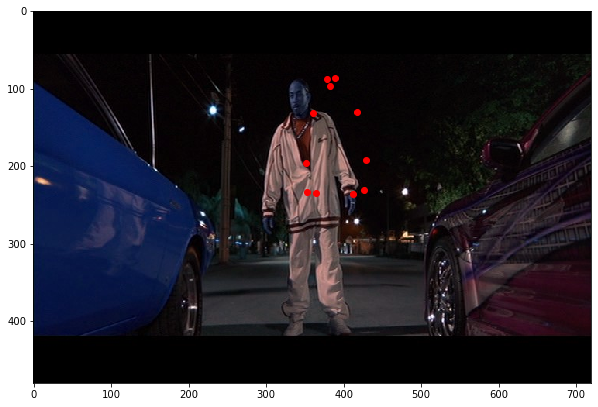

In [10]:
img = file_paths[299]
y_check = y_pred[299]

import cv2
from matplotlib import pyplot as plt

import time

start = time.time()

fig, ax = plt.subplots(figsize=(10,10))
image = cv2.imread(img)

for i in range(29):
    ax.scatter(y_pred[299][i], y_pred[299][i+29]-5, color='red')

ax.imshow(image)

end = time.time()

In [49]:
end - start

0.08653736114501953

In [50]:
1 / 0.086

11.627906976744187